<a href="https://colab.research.google.com/github/a-tkachenko54/colabs/blob/main/%D0%9F%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B8%D0%BD%D1%84%D0%BB%D1%8F%D1%86%D0%B8%D0%B8_2%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8_ipynb%22%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Предсказание инфляции

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

In [3]:
data_b = pd.read_excel('/content/drive/MyDrive/Стажировка/Данные для НС/Сводная_База_МЭП_DIMAR_И.xlsx', sheet_name='База', index_col=0)
data_d = pd.read_excel('/content/drive/MyDrive/Стажировка/Данные для НС/Сводная_База_МЭП_DIMAR_И.xlsx', sheet_name='Словарь_параметров', index_col=0)
data_b.head()

,Y1,X1,X2,X3,X4,X5,X6,X7,X9,X10,...,Z84,Z96,Z97,Z98,Z99,Z100,Z101,Z102,Z103,Y2
Т,,,,,,,,,,,,,,,,,,,,,
2013-01-01,5456.667632,100.9,850,1830.0,3372,427.3,511.4,269.7,1162.161,651.651,...,100.000000,59087.2129,14444,5456.667632,2202.70,7849.38,1.092678e+10,2908.98,5.660726e+10,1.0097
2013-02-01,5456.667632,100.8,863,1919.0,3031,391.9,652.5,284.1,1279.916,811.430,...,100.321494,67680.6465,13680,5456.667632,2202.71,7995.58,1.429568e+10,2918.63,5.018267e+10,1.0056
2013-03-01,5456.667632,100.5,925,2272.0,3439,429.3,741.5,385.8,1379.952,882.672,...,99.730395,72257.9989,12904,5456.667632,2202.72,8064.77,1.141143e+10,2688.17,5.101857e+10,1.0034
2013-04-01,5835.960594,100.2,915,2541.0,3506,417.1,771.6,399.7,1384.818,931.548,...,99.160994,73362.9039,12548,5835.960594,2202.73,7686.61,2.272075e+10,2397.30,5.984318e+10,1.0051
2013-05-01,5835.960594,100.0,885,2937.0,3812,425.1,987.0,449.0,1292.031,833.976,...,99.153420,66043.1814,12277,5835.960594,2202.74,7524.36,2.269822e+10,2279.33,4.457479e+10,1.0066


In [ ]:
data_b.shape

(120, 91)

In [5]:
x_train = data_b.iloc[:-12, :-1]
x_test = data_b.iloc[-12:, :-1]
print('Обучающая выборка X:', x_train.shape)
print('Проверочная выборка X:', x_test.shape)

Обучающая выборка X: (108, 90)
Проверочная выборка X: (12, 90)


In [ ]:
x_train.head()

,Y1,X1,X2,X3,X4,X5,X6,X7,X9,X10,...,Z80,Z84,Z96,Z97,Z98,Z99,Z100,Z101,Z102,Z103
Т,,,,,,,,,,,,,,,,,,,,,
2013-01-01,5456.667632,100.9,850,1830.0,3372,427.3,511.4,269.7,1162.161,651.651,...,2690.63,100.000000,59087.2129,14444,5456.667632,2202.70,7849.38,1.092678e+10,2908.98,5.660726e+10
2013-02-01,5456.667632,100.8,863,1919.0,3031,391.9,652.5,284.1,1279.916,811.430,...,2678.63,100.321494,67680.6465,13680,5456.667632,2202.71,7995.58,1.429568e+10,2918.63,5.018267e+10
2013-03-01,5456.667632,100.5,925,2272.0,3439,429.3,741.5,385.8,1379.952,882.672,...,2682.58,99.730395,72257.9989,12904,5456.667632,2202.72,8064.77,1.141143e+10,2688.17,5.101857e+10
2013-04-01,5835.960594,100.2,915,2541.0,3506,417.1,771.6,399.7,1384.818,931.548,...,2696.73,99.160994,73362.9039,12548,5835.960594,2202.73,7686.61,2.272075e+10,2397.30,5.984318e+10
2013-05-01,5835.960594,100.0,885,2937.0,3812,425.1,987.0,449.0,1292.031,833.976,...,2727.79,99.153420,66043.1814,12277,5835.960594,2202.74,7524.36,2.269822e+10,2279.33,4.457479e+10


In [6]:
y_train = data_b.iloc[:-12, -1]
y_test = data_b.iloc[-12:, -1]
print('Обучающая выборка Y:', y_train.shape)
print('Проверочная выборка Y:', y_test.shape)

Обучающая выборка Y: (108,)
Проверочная выборка Y: (12,)


In [7]:
y_train.head()

Т
2013-01-01    1.0097
2013-02-01    1.0056
2013-03-01    1.0034
2013-04-01    1.0051
2013-05-01    1.0066
Name: Y2, dtype: float64

In [13]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
print('Обучающая выборка X:', len(x_train))
print('Проверочная выборка X:', len(x_test))
print('Обучающая выборка Y:', len(y_train))
print('Проверочная выборка Y:', len(y_test))

Обучающая выборка X: 108
Проверочная выборка X: 12
Обучающая выборка Y: 108
Проверочная выборка Y: 12


In [ ]:
x_train.shape

(108, 90)

In [8]:
import matplotlib.pyplot as plt

In [9]:
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.models import Sequential, Model 
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten, Conv1D, Conv2D, LSTM

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler #Нормировщики

In [64]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator # для генерации выборки временных рядов

In [11]:
# Нормализуем данные по факторам (Х). Обучим нормализатор на обучающей выборке
x_train_scal = MinMaxScaler()
x_train_scal.fit(x_train)
xTrain = x_train_scal.transform(x_train)
xTest = x_train_scal.transform(x_test)

In [77]:
print(xTrain.shape)
print(xTest.shape)

(108, 90)
(12, 90)


In [14]:
# Добавляем размерность для результата (Y) и нормируем данные 
y_train = np.reshape(y_train, (-1,1))
y_test = np.reshape(y_test, (-1, 1))
y_train_scal = MinMaxScaler()
y_train_scal.fit(y_train)
yTrain = y_train_scal.transform(y_train)
yTest = y_train_scal.transform(y_test)

In [78]:
print(yTrain.shape)
print(yTest.shape)

(108, 1)
(12, 1)


Модель с Dense-слоями

In [84]:
model = Sequential()
model.add(Dense(10, input_shape = (xTrain.shape[1:]), activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(150, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(xTrain.shape[1], activation = 'linear'))

model.compile(loss = 'mean_squared_error',
              optimizer = 'adam', 
              metrics = ['mean_absolute_error'])
 
history = model.fit(xTrain, 
                    yTrain, 
                    batch_size = 2, 
                    epochs = 50, 
                    verbose = 1, 
                    validation_data=(xTest, yTest))

Epoch 1/50
54/54 [==============================] - 1s 5ms/step - loss: 0.0515 - mean_absolute_error: 0.1827 - val_loss: 0.2727 - val_mean_absolute_error: 0.3127
Epoch 2/50
54/54 [==============================] - 0s 2ms/step - loss: 0.0205 - mean_absolute_error: 0.0987 - val_loss: 0.2362 - val_mean_absolute_error: 0.2794
Epoch 3/50
54/54 [==============================] - 0s 3ms/step - loss: 0.0112 - mean_absolute_error: 0.0673 - val_loss: 0.2303 - val_mean_absolute_error: 0.3185
Epoch 4/50
54/54 [==============================] - 0s 2ms/step - loss: 0.0094 - mean_absolute_error: 0.0590 - val_loss: 0.2205 - val_mean_absolute_error: 0.2989
Epoch 5/50
54/54 [==============================] - 0s 2ms/step - loss: 0.0081 - mean_absolute_error: 0.0635 - val_loss: 0.2221 - val_mean_absolute_error: 0.3051
Epoch 6/50
54/54 [==============================] - 0s 3ms/step - loss: 0.0076 - mean_absolute_error: 0.0579 - val_loss: 0.2279 - val_mean_absolute_error: 0.3362
Epoch 7/50
54/54 [==========

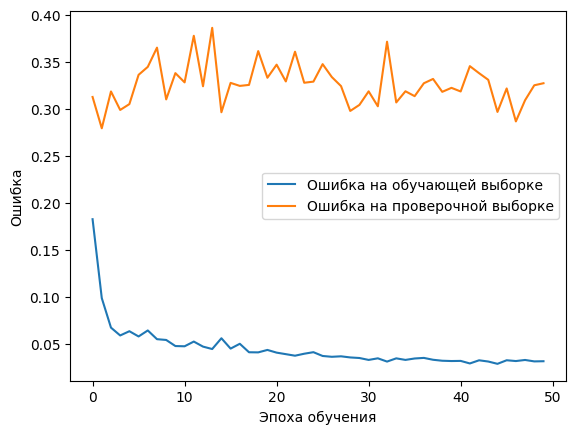

In [85]:
plt.plot(history.history['mean_absolute_error'], 
         label='Ошибка на обучающей выборке')
plt.plot(history.history['val_mean_absolute_error'], 
         label='Ошибка на проверочной выборке')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [86]:
# Функция рассчитываем результаты прогнозирования сети
# В аргументы принимает сеть (currModel) и проверочную выборку
# Выдаёт результаты предсказания predVal
# И правильные ответы в исходной размерности yValUnscaled (какими они были до нормирования)
def getPred(currModel, xVal, yVal, yScaler):
  # Предсказываем ответ сети по проверочной выборке
  # И возвращаем исходны масштаб данных, до нормализации
  predVal = yScaler.inverse_transform(currModel.predict(xVal))
  yValUnscaled = yScaler.inverse_transform(yVal)
  
  return (predVal, yValUnscaled)

# Функция визуализирует графики, что предсказала сеть и какие были правильные ответы
# start - точка с которой начинаем отрисовку графика
# step - длина графика, которую отрисовываем
# channel - какой канал отрисовываем
def showPredict(start, step, channel, predVal, yValUnscaled):
  plt.figure(figsize=(22,6))
  plt.plot(predVal[start:start+step, 0],
           label='Прогноз')
  plt.plot(yValUnscaled[start:start+step, channel], 
           label='Базовый ряд')
  plt.xlabel('Время')
  plt.ylabel('Значение Close')
  plt.legend()
  plt.show()

1/1 [==============================] - 0s 53ms/step


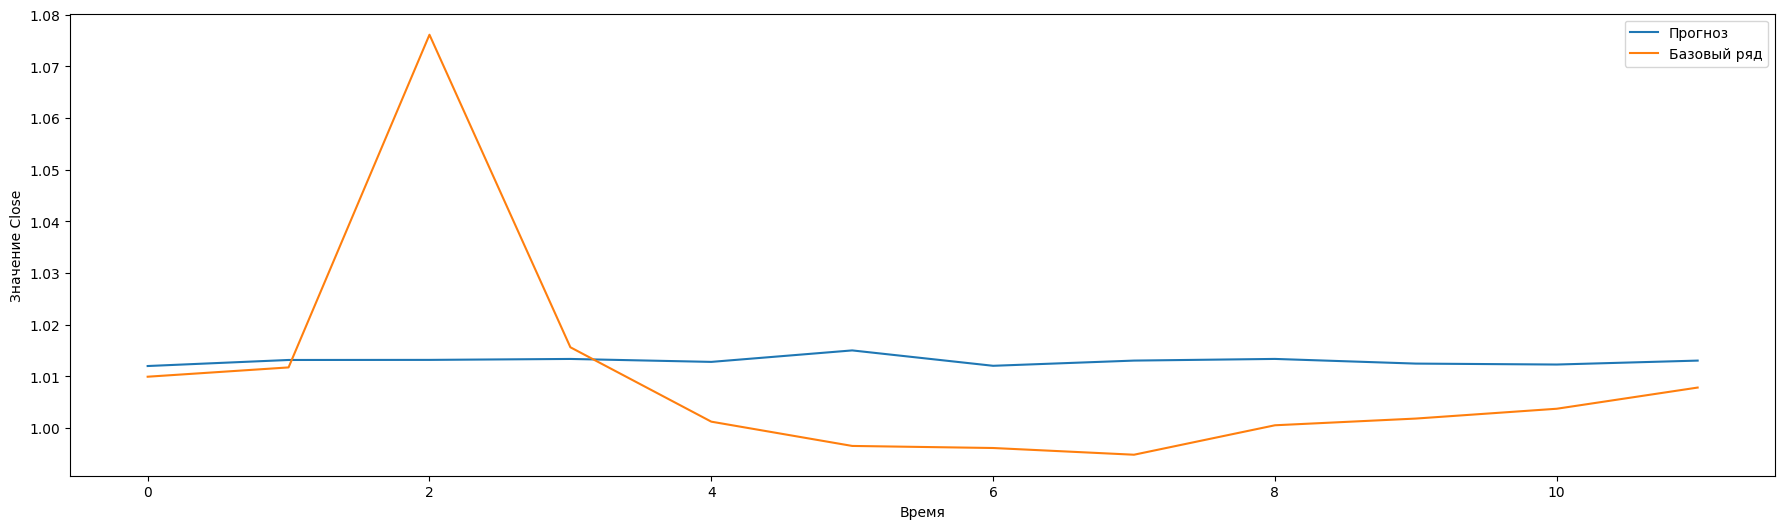

In [89]:
#Прогнозируем данные текущей сетью
currModel = model #Выбираем текущую модель
(predVal, yValUnscaled) = getPred(currModel, xTest, yTest, y_train_scal) #Прогнозируем данные

#Отображаем графики
showPredict(0, 12, 0, predVal, yValUnscaled)

Модель с LSTM-слоем

In [115]:
#Генератор обучения 
trainDataGen = TimeseriesGenerator(xTrain, yTrain,           #В качестве параметров наши выборки
                               length=107, stride=1, sampling_rate=1, #Для каждой точки (из промежутка длины xLen)
                               batch_size=4)                #Размер batch, который будем скармливать модели


In [100]:
print(xTrain.shape)
print(yTrain.shape)

(108, 90)
(108, 1)


In [135]:
#Генератор проверки
testDataGen = TimeseriesGenerator(xTest, yTest,
                               length=11, stride=1,
                               batch_size=2)

In [151]:
print(xTest.shape)
print(yTest.shape)

(12, 90)
(12, 1)


In [105]:
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten, Conv1D, Conv2D, LSTM, MaxPooling1D

In [175]:
modelL = Sequential()
modelL.add(LSTM(16, input_shape = (108,90)))
modelL.add(Dense(100, activation="relu"))
modelL.add(Dense(1, activation="linear"))

In [176]:
modelL.compile(loss = 'mean_squared_error',
              optimizer = 'adam', 
              metrics = ['mean_absolute_error'])

In [177]:
history = modelL.fit(trainDataGen, 
                    epochs=20, 
                    verbose=1,
                    validation_data=testDataGen)

Epoch 1/20
1/1 [==============================] - 3s 3s/step - loss: 0.1847 - mean_absolute_error: 0.4298 - val_loss: 0.1064 - val_mean_absolute_error: 0.3263
Epoch 2/20
1/1 [==============================] - 0s 97ms/step - loss: 0.1000 - mean_absolute_error: 0.3162 - val_loss: 0.0918 - val_mean_absolute_error: 0.3030
Epoch 3/20
1/1 [==============================] - 0s 56ms/step - loss: 0.0601 - mean_absolute_error: 0.2452 - val_loss: 0.0759 - val_mean_absolute_error: 0.2754
Epoch 4/20
1/1 [==============================] - 0s 56ms/step - loss: 0.0403 - mean_absolute_error: 0.2006 - val_loss: 0.0595 - val_mean_absolute_error: 0.2438
Epoch 5/20
1/1 [==============================] - 0s 51ms/step - loss: 0.0241 - mean_absolute_error: 0.1551 - val_loss: 0.0406 - val_mean_absolute_error: 0.2015
Epoch 6/20
1/1 [==============================] - 0s 50ms/step - loss: 0.0112 - mean_absolute_error: 0.1060 - val_loss: 0.0231 - val_mean_absolute_error: 0.1521
Epoch 7/20
1/1 [====================

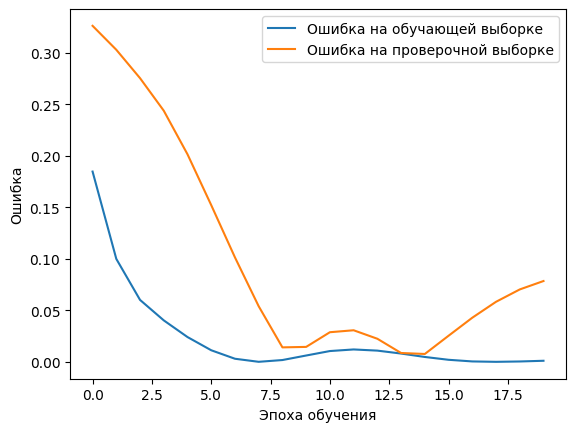

In [178]:
plt.plot(history.history['loss'], 
         label='Ошибка на обучающей выборке')
plt.plot(history.history['val_mean_absolute_error'], 
         label='Ошибка на проверочной выборке')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()